In [ ]:
import os
import sys
import matplotlib.pyplot as plt
from wqsat_format import s2_reader, utils, preprocessing

In [ ]:
input_path = '****'
tiles = os.listdir(input_path)

output_path = '***'
for i, tile in enumerate(tiles):
    print(f"Processing tile {i+1}/{len(tile)}: {tile}")

    output_tile_path = os.path.join(output_path, tile)
    if os.path.exists(output_tile_path):
        continue
    else:

        tile_path = os.path.join(input_path, tile)
        bands = ["B04", "B03", "B02", "B08"]

        # Read bands
        reader = s2_reader.S2Reader(tile_path, bands=bands)
        arr_bands, metadata = reader.read_bands()

        # Read Sun angle
        SunAngle = utils.read_sun_angle(tile_path)

        # Apply atmospheric correction
        processor = preprocessing.Atcor(arr_bands, SunAngle['ZENITH_ANGLE'], SunAngle['AZIMUTH_ANGLE'])
        arr_atcor = processor.apply_all_corrections()

        # Export to GeoTIFF
        os.makedirs(output_tile_path)
        utils.export_by_resolution(arr_atcor, metadata, output_tile_path)

Processing tile 1/65: S2B_MSIL1C_20220409T020649_N0400_R103_T52SEE_20220409T033744.SAFE
Processing tile 2/65: S2B_MSIL1C_20220410T013649_N0400_R117_T53SPA_20220410T031432.SAFE
Processing tile 3/65: S2B_MSIL1C_20220413T082559_N0400_R021_T34LEK_20220413T110124.SAFE
Processing tile 4/65: S2B_MSIL1C_20220418T105619_N0400_R094_T32VLN_20220418T115134.SAFE
Processing tile 5/65: S2B_MSIL1C_20220510T070049_N0400_R120_T39KUB_20220510T094410.SAFE
Processing tile 6/65: S2B_MSIL1C_20220519T202849_N0400_R114_T07VFG_20220520T001252.SAFE
Processing tile 7/65: S2B_MSIL1C_20220528T105619_N0400_R094_T30TVK_20220528T114625.SAFE
Processing tile 8/65: S2B_MSIL1C_20221016T020649_N0400_R103_T54VWN_20221016T035744.SAFE
Processing tile 9/65: S2B_MSIL1C_20221018T125259_N0400_R138_T28WDS_20221018T145835.SAFE
Processing tile 10/65: S2B_MSIL1C_20230709T142719_N0509_R053_T18FWM_20230709T175036.SAFE
Processing tile 11/65: S2B_MSIL1C_20230710T223719_N0509_R072_T59GLM_20230710T232840.SAFE
Processing tile 12/65: S2B_MSI

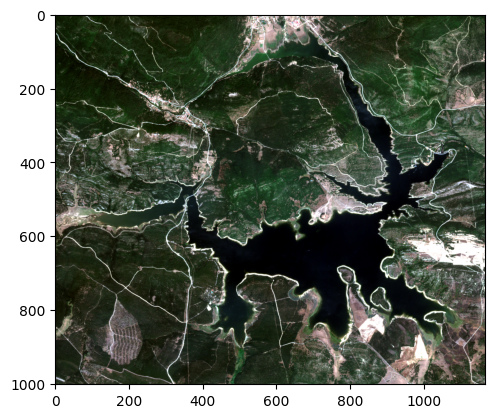

In [9]:
rgb = utils.rgb_image(arr_bands['10']['B04'], arr_bands['10']['B03'], arr_bands['10']['B02'])
plt.imshow(rgb)